# CIDS Carpentries Workshop - Episode 9 - Data Analysis with Pandas
This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/) lesson.

---

## ❓ Questions and Objectives
What should you be able to answer by the end of this episode?

### Questions
- What is Pandas?
- Why should I use Pandas to work with data?
- How can I access specific data within my data set?
- How can Python and Pandas help me to analyse my data?

### Objectives
- Describe what the Python Data Analysis Library (Pandas) is.
- Load the Python Data Analysis Library (Pandas).
- Use read_csv to read tabular data into Python.
- Access and summarise data stored in a DataFame.
- Perform basic mathematical operations and summary statistics on data in a Pandas DataFrame.
- Manipulate and extract data using column headings and index locations.
- Employ slicing to select sets of data from a DataFrame.
- Employ label and integer-based indexing to select ranges of data in a dataframe.
- Query / select a subset of data using a set of criteria using the following operators: ==, !=, >, <, >=, <=.
---


## About Our Data

For this lesson, we will be using the Portal Teaching data, a subset of the data
from Ernst et al
[Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

We will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).
This section will use the `surveys.csv` file which can be found in `../data/`.

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot             | ID of a particular plot            |
| species          | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| wgt              | weight of the animal in grams      |


The first few rows of our first file look like this:

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
```
---

## Pandas in Python
One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.

In [207]:
# Importing Pandas library
import pandas as pd

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.

A handy **Pandas cheatsheet** can be found [here](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

---

## Reading CSV Data using Pandas
We will begin by locating and reading our survey data which is in CSV format. We can use Pandas' `read_csv` function to pull the file directly into a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dataframe).

### So What's a DataFrame?
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in R. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure.

Let’s call the imported survey data `surveys_df`:

In [208]:
# Note that pd.read_csv is used because we imported pandas as pd
surveys_df = pd.read_csv("../data/surveys.csv")

Notice when you assign the imported DataFrame to a variable, Python does not produce any output on the screen. We can view the value of the `surveys_df` object by typing its name into the Python command prompt.

In [209]:
# Viewing the dataframe
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can see that there were 35,549 rows parsed. Each row has 9 columns. The first column is the index of the DataFrame. The index is used to identify the position of the data, but it is not an actual column of the DataFrame. It looks like the `read_csv` function in Pandas read our file properly.

---

## Exploring Our Species Survey Data

Now, we can start exploring our data. First, let's check the data type of the data stored in `surveys_df` using the `type` method.

In [210]:
# Inspecting the type of surveys_df
type(surveys_df)

pandas.core.frame.DataFrame

What kind of things does `surveys_df` contain? DataFrames conveniently has an attribute called `dtypes` which answers this by returning the data type for each column in our DataFrame.

In [211]:
# Inspecting the types within surveys_df
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

All the values in a column have the same data type. 

Recalling from the previous episode about Python data types. Pandas and base Python use slightly different names for data types.

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime](http://doc.python.org/2/library/datetime.html) module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

For example, months have type `int64`, which is an integer. Weight and hindfoot_length have type `float64` which is a floating point value. The `object` type in species_id and sex doesn't have a very helpful name, but in this case it represents strings.

### Useful Ways to View DataFrame Objects in Python
There are many ways to summarise and access the data stored in DataFrames, using attributes and methods provided by the DataFrame object.

Let's try out a few.

To access an attribute, use the DataFrame object name followed by the attribute `df_object.attribute`. Using the DataFrame `surveys_df` and attribute `columns`, an index of all the column names in the DataFrame can be access with `surveys_df.columns`.

In [212]:
# Inspecting the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Methods are called in a similar fashion using the syntax `df_object.method()`. As an example, `surveys_df.head()` gets the first few rows in the DataFrame `surveys_df` using **the `head()` method**. With a method, we can supply extra information in the parenthesis to control behaviour.

In [213]:
# Inspecting the first few rows of the dataframe
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


### Calculating Statistics from Data in a Pandas DataFrame
We've now read our data into Python. Next, let's perform some quick summary statistics to learn more about the data that we're working with. We might want to know how many animals were collected in each site, or how many of each species were caught. We can perform summary stats quickly using groups. But first, we need to figure out what we want to group by.

Let's explore our data some further:

In [214]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

Let's get a list of all the species. The `pd.unique` function tells us all of the unique values in the `species_id` column.

In [215]:
# Look at the unique species ids
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

That's useful, but how would we identify the number of unique species in the data? We can use the `len()` function as before or `the .nunique()` function in Pandas.

In [216]:
# Using the len() function
len(surveys_df['species_id'].unique())

49

In [217]:
# Using the .nunique() function
surveys_df['species_id'].nunique()

48

### Groups in Pandas
We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the Pandas `.describe` function.

In [218]:
# Summary statistics for the entire dataframe
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.477847,15.991195,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396925,8.257366,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [219]:
# Summary statistics for the weight column
surveys_df['weight'].describe()


count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

We can also extract specific metrics if we wish.

In [220]:
# Mean
surveys_df['weight'].mean()

np.float64(42.672428212991356)

In [221]:
# Others?
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].std()
surveys_df['weight'].count()

np.int64(32283)

But if we want to summarize by one or more variables, for example `sex`, we can use Pandas’ `.groupby` method. Once we’ve created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [222]:
# Group data by sex and assign to a variable
grouped_data = surveys_df.groupby('sex')

The pandas function describe will return descriptive stats including: mean, median, max, min, std and count for a particular column in the data. Pandas’ describe function will only return summary values for columns containing numeric data.

In [223]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                month            ... hindfoot_length         weight  \
         max    count      mean  ...             75%   max    count   
sex                              ...                                  
F    35547.0  15690.0  6.587253  ...            36.0  64.0  15303.0   
M    35548.0  17348.0  6.396184  ...            36.0  58.0  16879.0   

                                                         
          mean        std  min   25%   50%   75%    max  
sex                                                      
F    42.170555  36.847958  4.0  20.0  34.0  46.0  274.0  
M    42.995379  36.184981  4.0  20.0  39.0  49.0  280.0  

[2 rows x 56 columns]

In [224]:
# Provide the mean for each numeric column by sex
grouped_data.mean(numeric_only=True)

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.587253,15.880943,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.396184,16.078799,1990.480401,11.098282,29.709578,42.995379


---

## Quick and Easy Plotting using Pandas

We can plot summary stats using Pandas too.

In [225]:
# Make sure figures appear inline in our Ipython Notebook 
# (sometimes automatic, good to always include!)
%matplotlib inline

In [226]:
# Create a total_count variable that sums the 'record_id' values for each site
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()

<Axes: xlabel='plot_id'>

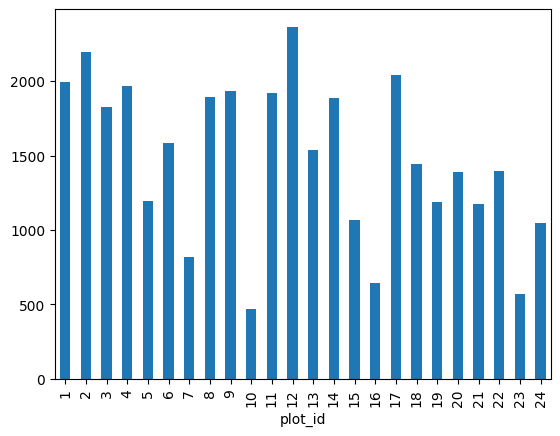

In [227]:
# Now plot it
total_count.plot(kind='bar')

---

## Indexing and Slicing in Pandas
We often want to work with subsets of a **DataFrame** object. There are different ways to accomplish this including: using labels (column headings), numeric ranges, or specific x,y index locations.

We use square brackets `[]` to select a subset of a Python object. For example, we can select all data from a column named `species_id` from the `surveys_df` DataFrame by name. There are two ways to do this.


In [228]:
# Method 1: Select a 'subset' of the data using the column name
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [229]:
# Method 2: Use the column name as an 'attribute'
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

We can also create a new object that contains only the data within the `species_id` column as follows:

In [230]:
# Create an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']

We can pass a list of column names too, as an index to select columns in that order. This is useful when we need to reorganise our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception (error) will be raised.

In [231]:
# Select the species and plot_id columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

,species_id,plot_id
0,NL,2
1,NL,3
2,DM,2
3,DM,7
4,DM,3
...,...,...
35544,AH,15
35545,AH,15
35546,RM,10
35547,DO,7


In [232]:
# What happens if we flip the order?
surveys_df[['plot_id', 'species_id']]

,plot_id,species_id
0,2,NL
1,3,NL
2,2,DM
3,7,DM
4,3,DM
...,...,...
35544,15,AH
35545,15,AH
35546,10,RM
35547,7,DO


In [233]:
# What happens if you ask for a column that doesn't exist?
surveys_df['speciess']

KeyError: 'speciess'

Python tells us what type of error it is in the traceback, at the bottom it says KeyError: 'speciess' which means that speciess is not a valid column name (nor a valid key in the related Python data type dictionary).

---

## Slicing Subsets of Rows in Pandas
Slicing using the `[]` operator selects a set of rows and/or columns from a DataFrame. To slice out a set of rows, you use the following syntax `data[start:stop]`. When slicing in Pandas, the start bound is included in the output. The stop bound is one step BEYOND the row you want to select. So if you want to select rows 0, 1 and 2; your code would look like this.



In [ ]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

In [ ]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

In [ ]:
# Select the last row
surveys_df[-1:]

---

## Slicing Subsets of Rows and Columns in Python
We can select specific ranges of our data in both the row and column directions using either label or integer-based indexing.
- `loc`: *label* based indexing where you can refer to rows and columns by their name (which can be integers)
- `iloc`: *integer* based indexing counting from 0

To select a subset of rows **and** columns from our DataFrame, we can use the `iloc` method. For example, we can select month, day and year (columns 1, 2 and 3 if we start counting at 0), like this:

In [ ]:
# Let's look at the dataframe
surveys_df

In [ ]:
# iloc[row slicing, column slicing]
surveys_df.iloc[0:3, 1:4]

Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you ask for 0:3, you are actually telling Python to start at index 0 and select rows 0, 1, 2 **up to but not including 3.**

Let's explore some other ways to index and select subsets of data:

In [ ]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

In [ ]:
# Select using column names
surveys_df.loc[0, ['species_id', 'plot_id', 'weight']]

In [ ]:
# Selecting out of bounds
surveys_df.loc[[0, 10, 35549], :]

**NOTE**: Labels must be found in the DataFrame or you will get a `KeyError`.

Indexing by labels `loc` differs from indexing by integers `iloc`. With `loc`, both the start bound and the stop bound are **inclusive**. When using `loc`, integers *can* be used, but the integers refer to the index label and not the position.  For example, using `loc` and selecting 1:4 will get a different result than using `iloc` to select rows 1:4.

In [ ]:
# Using `loc`
surveys_df.loc[1, 4]

In [ ]:
# Using `iloc`
surveys_df.iloc[1, 4]

We can also select a specific data value using a row and column location within the DataFrame and `iloc` indexing:

In [ ]:
# dat.iloc[row, column]
surveys_df.iloc[2, 6]

Remember that Python indexing begins at 0. So, the index location [2,6] selects the element that is 3 rows down and 7 columns over in the DataFrame.

---

## Subsetting Data using Criteria
We can also select a subset of our data using criteria. For example, we can select all rows that have a year value of 2002:


In [ ]:
# Selecting rows where the year is 2002
surveys_df[surveys_df.year == 2002]

Or we can select all rows that do not contain the year 2002:

In [ ]:
# Selecting rows where the year is not 2002
surveys_df[surveys_df.year != 2002]

We can define sets of criteria too:

In [ ]:
# Selecting rows where the year is between 1980 and 1985
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

---

## 🏆 Exercises

### ✏️ Exercise 1 : Pandas Attributes and Methods
Using our DataFrame `surveys_df`, try out the attributes and methods to see what they return.
1. `surveys_df.columns`
2. `surveys_df.shape` - take a note of the output of `shape` - what format does it return the shape of the DataFrame in?
3. `surveys_df.head(15)`
4. `surveys_df.tail()`


In [ ]:
# 1
surveys_df.columns

In [ ]:
# 2
surveys_df.shape

In [ ]:
# 3
surveys_df.head(15)

In [ ]:
# 4
surveys_df.tail()

### ✏️ Exercise 2 : Summary Data
1. How many recorded individuals are female `F` and how many male `M`?
2. What happens when you group by two columns using the following syntax and then calculate mean values?
 - `grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])`
 - `grouped_data2.mean()`
3.  Summarize weight values for each site in your data. HINT: you can use the following syntax to only create summary statistics for one column in your data. by_`site['weight'].describe()`

In [ ]:
# 1
surveys_df.groupby('sex')['record_id'].count()

In [ ]:
# 2
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean(numeric_only=True)

In [ ]:
# 3
surveys_df.groupby('plot_id')['weight'].describe()

### ✏️ Exercise 3 : Selecting Data in Pandas
1. What happens when you execute the following:
    - `surveys_df[0:1]`
    - `surveys_df[0]`
    - `surveys_df[:4]`
    - `surveys_df[:-4]`
2. What happens when you call:
    - `surveys_df.iloc[0:1]`
    - `surveys_df.iloc[0]`
    - `surveys_df.iloc[:4, :]`
    - `surveys_df.iloc[0:4, 1:4]`
    - `surveys_df.loc[0:4, 1:4]`

How are the two sets of commands different?

In [ ]:
# 1a
surveys_df[0:1]

In [ ]:
# 1b
surveys_df[0]

In [ ]:
# 1c
surveys_df[0:4]

In [ ]:
# 1d
surveys_df[:-4]

In [ ]:
# 2a
surveys_df.iloc[0:1]

In [ ]:
# 2b
surveys_df.iloc[0]

In [ ]:
# 2c
surveys_df.iloc[:4, :]

In [ ]:
# 2d# 2d
surveys_df.iloc[0:4, 1:4]

In [ ]:
# 2e
surveys_df.loc[0:4, 1:4]

### ✏️ Exercise 4 : Queries using Criteria
1. Select a subset of rows in the surveys_df DataFrame that contain data from the year 1999 and that contain weight values less than or equal to 8. How many rows did you end up with? What did your neighbor get?

2. You can use the isin command in Python to query a DataFrame based upon a list of values as follows:
```py
surveys_df[surveys_df['species_id'].isin([listGoesHere])]
```

3. Experiment with other queries. Create a query that finds all rows with a weight value greater than or equal to 0.

4. The ~ symbol in Python can be used to return the OPPOSITE of the selection that you specify. It is equivalent to is not in. Write a query that selects all rows with sex NOT equal to ‘M’ or ‘F’ in the “surveys” data.

In [ ]:
# 1 
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]

# If you are only interested in how many rows meet the criteria, the sum of True values could be used instead:
# sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)) 

In [ ]:
# 2
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique()

#  How many unique outputs?
#  surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique().shape

In [ ]:
# 3
surveys_df[surveys_df["weight"] >= 0]

In [ ]:
# 4
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]

---

## 🔑 Key Points
- Libraries enable us to extend the functionality of Python.
- Pandas is a popular library for working with data.
- A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row.
- Aggregating data using the groupby() function enables you to generate useful summaries of data quickly.